<a href="https://colab.research.google.com/github/feliciahf/data_science_exam/blob/main/hippocorpus_topicmodeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [1]:
!pip install pyLDAvis

In [2]:
import pandas as pd
import numpy as np
import re
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint

# Gensim
import gensim 
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


# Load dataset

In [3]:
# import csv file as dataframe (from GitHub repo)
url = 'https://raw.githubusercontent.com/feliciahf/data_science_exam/main/hippoCorpusV2.csv'
df = pd.read_csv(url, encoding='latin1')
story = df["story"]

# Clean data

In [4]:
# tokenization 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(story))

In [5]:
# remove stopwords
stop_words = nltk.corpus.stopwords.words('english')
stop_words = list(stop_words)
#stop_words.extend(["time", "day"])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data_words = remove_stopwords(data_words)

In [6]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words 
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Topic Modelling

In [9]:
# create LDA model
Model = gensim.models.LdaModel(corpus, id2word=id2word, num_topics=2)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [10]:
# print topics
topics = Model.print_topics(num_words=20)
for topic in topics:
    print(topic)

(0, '0.009*"time" + 0.008*"would" + 0.007*"day" + 0.007*"get" + 0.006*"got" + 0.006*"like" + 0.006*"one" + 0.006*"back" + 0.006*"go" + 0.005*"went" + 0.005*"home" + 0.004*"could" + 0.004*"work" + 0.004*"us" + 0.004*"life" + 0.004*"really" + 0.004*"felt" + 0.004*"family" + 0.004*"new" + 0.004*"going"')
(1, '0.011*"time" + 0.007*"day" + 0.007*"would" + 0.007*"really" + 0.007*"one" + 0.006*"like" + 0.006*"get" + 0.006*"got" + 0.006*"went" + 0.005*"life" + 0.005*"family" + 0.005*"could" + 0.005*"going" + 0.005*"us" + 0.005*"much" + 0.004*"people" + 0.004*"good" + 0.004*"ago" + 0.004*"also" + 0.004*"even"')


In [11]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(Model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster      Freq
topic                                          
1      0.021736  0.0       1        1  53.80989
0     -0.021736  0.0       2        1  46.19011, topic_info=         Term         Freq        Total Category  logprob  loglift
291       car  1524.000000  1524.000000  Default  30.0000  30.0000
804   wedding  1092.000000  1092.000000  Default  29.0000  29.0000
146  hospital   956.000000   956.000000  Default  28.0000  28.0000
35       love  1587.000000  1587.000000  Default  27.0000  27.0000
309        go  3551.000000  3551.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
155    months  1314.219716  3116.710421   Topic2  -5.6419  -0.0911
50        see  1307.010084  3137.984036   Topic2  -5.6474  -0.1034
274    really  1443.761921  4315.909797   Topic2  -5.5479  -0.3227
116       ago  1211.351992  3069.388789   Topic2  -5.7234  -0.1573
140     first  1197.679734  2996.528458   Topic2  -5.7348  -0.1447

[226 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
116       1  0.605332      ago
116       2  0.394541      ago
284       1  0.655040     also
284       2  0.345148     also
1628      1  0.806161  amazing
...     ...       ...      ...
194       2  0.552951     work
195       1  0.509504    would
195       2  0.490560    would
709       1  0.649870    years
709       2  0.349961    years

[354 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

# Wordclouds

## Real categories

In [12]:
df1 = df.drop(columns=["mainEvent", "mostSurprising", "similarityReason", "summary", "AssignmentId", "WorkerId", "recAgnPairId", "recImgPairId", "WorkTimeInSeconds", "annotatorAge", "annotatorGender", "annotatorRace", "distracted", "draining", "frequency", "importance", "logTimeSinceEvent", "openness", "similarity", "stressful", "timeSinceEvent"])

imagined = df1[df1['memType']=='imagined']
imagined = imagined.drop(columns=["memType"])
imagined = imagined.stack().str.split("[^\w+]").explode().tolist()
imagined = ' '.join(map(str, imagined))

recalled = df1[df1['memType']=='recalled']
recalled = recalled.drop(columns=["memType"])
recalled = recalled.stack().str.split("[^\w+]").explode().tolist()
recalled = ' '.join(map(str, recalled))

<input>:5: DeprecationWarning: invalid escape sequence \w
<input>:5: DeprecationWarning: invalid escape sequence \w
<input>:5: DeprecationWarning: invalid escape sequence \w
<input>:5: DeprecationWarning: invalid escape sequence \w
<input>:5: DeprecationWarning: invalid escape sequence \w
<input>:5: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:5: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<ipython-input-12-da5120dac658>:5: DeprecationWarning: invalid escape sequence \w
  imagined = imagined.stack().str.split("[^\w+]").explode().tolist()
<ipython-input-12-da5120dac658>:10: DeprecationWarning: invalid escape sequence \w
  recalled = recalled.stack().str.split("[^\w+]").explode().tolist()


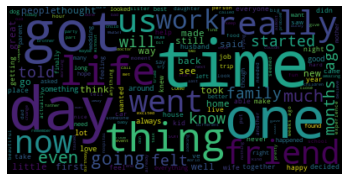

In [13]:
# imagined
wordcloud_im = WordCloud().generate(imagined)
plt.imshow(wordcloud_im, interpolation='bilinear')
plt.axis("off")
plt.show()

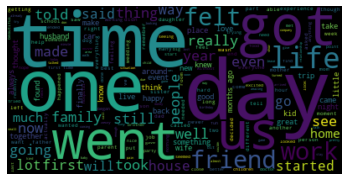

In [14]:
# recalled
wordcloud_rec = WordCloud().generate(recalled)
plt.imshow(wordcloud_rec, interpolation='bilinear')
plt.axis("off")
plt.show()

## Categories from topic modeling

In [15]:
for idx, topic in Model.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(idx, [w[0] for w in topic]))

Topic: 0 
Words: ['time', 'would', 'day', 'get', 'got', 'like', 'one', 'back', 'go', 'went', 'home', 'could', 'work', 'us', 'life', 'really', 'felt', 'family', 'new', 'going', 'said', 'months', 'see', 'car', 'still', 'never', 'ago', 'started', 'first', 'around']
Topic: 1 
Words: ['time', 'day', 'would', 'really', 'one', 'like', 'get', 'got', 'went', 'life', 'family', 'could', 'going', 'us', 'much', 'people', 'good', 'ago', 'also', 'even', 'see', 'know', 'months', 'first', 'made', 'great', 'years', 'friends', 'lot', 'back']


In [16]:
# create topic lists
topic0 = Model.show_topics(formatted=False, num_words= 1000)[0][1]
topic1 = Model.show_topics(formatted=False, num_words= 1000)[1][1]

In [17]:
# convert lists to dictionaries
dict0 = {}
for x1 in topic0:
    dict0[x1[0]] = x1[1]
dict1 = {}
for x1 in topic1:
    dict1[x1[0]] = x1[1]

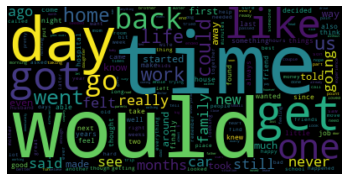

In [18]:
# wordcloud topic0
wordcloud_topic0 = WordCloud().fit_words(dict0)
plt.imshow(wordcloud_topic0, interpolation='bilinear')
plt.axis("off")
plt.show()

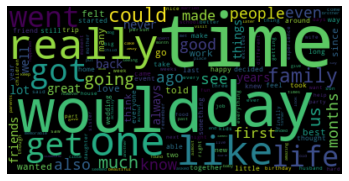

In [19]:
# wordcloud topic1
wordcloud_topic1 = WordCloud().fit_words(dict1)
plt.imshow(wordcloud_topic1, interpolation='bilinear')
plt.axis("off")
plt.show()